In [79]:
#Filter Warning
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Source
import yfinance as yf
from sklearn.preprocessing import StandardScaler

# For time stamps
from datetime import datetime
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import os
from keras.models import load_model
import time
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from collections import Counter

In [80]:
#take target data
target_data = yf.Ticker("TSLA").history('12mo').reset_index().filter(["Close"])

In [81]:
target_data

,Close
0,379.019989
1,385.623322
2,369.676666
3,372.000000
4,360.640015
...,...
247,190.949997
248,194.419998
249,186.919998
250,183.169998


In [82]:
path = 'C:/Users/keong/Documents/metaLearningForecasting/daily_dataset/' 
iter = 0
tsne_daily = pd.DataFrame([])
for file in os.listdir('C:/Users/keong/Documents/metaLearningForecasting/daily_dataset/'):
    if file.endswith(".csv"):
        files = os.listdir(path)
        df = pd.read_csv(path+str(file))
        df = df.filter(["Close"])
        tsne_daily["Close"+ str(iter)] = df
        iter +=1
tsne_daily["Close"+ str(iter)] = target_data

In [83]:
tsne_daily

,Close0,Close1,Close2,Close3,Close4,Close5,Close6,Close7,Close8,Close9,...,Close1002,Close1003,Close1004,Close1005,Close1006,Close1007,Close1008,Close1009,Close1010,Close1011
0,20.059999,145.520004,212.710007,39.400002,115.449997,122.730003,328.359985,145.490005,120.919998,39.209999,...,550.969971,129.350006,108.750000,51.630001,54.779999,378.959991,239.039993,202.110001,107.519997,379.019989
1,19.950001,147.360001,215.399994,40.380001,116.250000,123.709999,326.519989,145.649994,122.120003,39.340000,...,546.739990,127.209999,105.639999,52.740002,56.500000,374.880005,243.070007,204.100006,104.589996,385.623322
2,19.450001,146.949997,209.669998,38.750000,115.080002,125.550003,331.200012,147.399994,121.570000,39.419998,...,560.000000,127.459999,110.430000,52.230000,60.599998,400.579987,247.929993,204.789993,109.230003,369.676666
3,20.910000,147.059998,206.339996,38.750000,115.120003,121.889999,348.859985,150.320007,122.209999,39.990002,...,569.219971,129.419998,110.300003,53.119999,66.580002,398.679993,247.669998,203.839996,110.239998,372.000000
4,21.020000,146.139999,205.720001,40.709999,114.449997,120.639999,345.880005,149.990005,122.169998,40.580002,...,562.270020,128.619995,103.239998,54.990002,64.540001,383.470001,242.050003,201.880005,101.150002,360.640015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,13.750000,152.949997,189.630005,46.799999,150.220001,144.149994,280.440002,104.949997,108.500000,44.080002,...,325.369995,75.250000,35.790001,54.090000,37.099998,106.099998,156.089996,175.179993,35.709999,195.970001
247,13.430000,151.600006,182.869995,46.990002,150.869995,145.199997,278.510010,101.910004,109.089996,44.240002,...,326.970001,74.610001,33.860001,52.740002,35.450001,100.330002,141.949997,176.380005,33.720001,190.949997
248,13.970000,156.789993,185.910004,47.750000,151.149994,145.070007,285.179993,107.360001,109.989998,44.279999,...,338.489990,74.940002,36.029999,53.549999,37.049999,105.910004,148.710007,177.470001,35.779999,194.419998
249,13.760000,157.350006,191.029999,49.080002,149.750000,145.570007,292.200012,108.839996,110.360001,43.290001,...,344.500000,75.110001,34.900002,53.480000,37.520000,106.220001,153.059998,182.270004,34.689999,186.919998


In [84]:
tsne_daily_transposed = tsne_daily.T
X = tsne_daily_transposed
X = X.fillna(0)
lst = []
for i in range(X.shape[1]):
    if X.iloc[i:i+1,:].isnull().values.any() ==  True:
        lst.append(i)
        print(i)
print(len(lst))
X.dropna(inplace=True)
list = range(1,X.shape[0]+1)
arr = np.array(list)

0


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1012 samples in 0.001s...
[t-SNE] Computed neighbors for 1012 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1012
[t-SNE] Computed conditional probabilities for sample 1012 / 1012
[t-SNE] Mean sigma: 32.186113
[t-SNE] Computed conditional probabilities in 0.011s
[t-SNE] Iteration 50: error = 81.2304688, gradient norm = 0.4529639 (50 iterations in 0.076s)
[t-SNE] Iteration 100: error = 73.5222778, gradient norm = 0.4318768 (50 iterations in 0.070s)
[t-SNE] Iteration 150: error = 70.2150955, gradient norm = 0.4182887 (50 iterations in 0.076s)
[t-SNE] Iteration 200: error = 70.3381119, gradient norm = 0.4154830 (50 iterations in 0.069s)
[t-SNE] Iteration 250: error = 68.6478729, gradient norm = 0.4192404 (50 iterations in 0.073s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.647873
[t-SNE] Iteration 300: error = 1.3236830, gradient norm = 0.0025768 (50 iterations in 0.082s

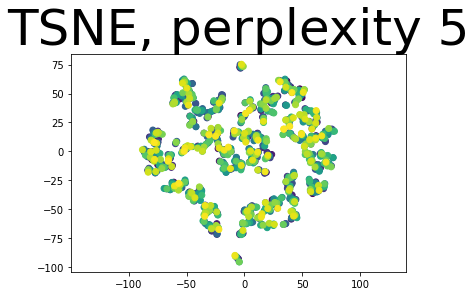

In [85]:
tsne = TSNE(n_components=2,verbose=10,perplexity=5)
z_tsne = tsne.fit_transform(X)
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=arr)
plt.title("TSNE, perplexity 5",size=50)
plt.axis("equal")
plt.show()

In [86]:
a = z_tsne
a = pd.DataFrame(a)
a.to_csv("C:/Users/keong/Documents/metaLearningForecasting/daily_tsne.csv")

,0,1
0,12.349751,-56.647297
1,-47.122810,50.883896


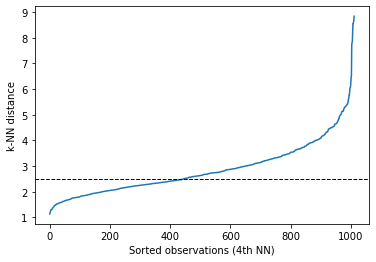

In [87]:
df = pd.read_csv("C:/Users/keong/Documents/metaLearningForecasting/daily_tsne.csv")
df = df.drop("Unnamed: 0", axis='columns')
display(df.head(2))
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=50).fit(df)
neigh_dist, neigh_ind = nbrs.kneighbors(df)
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

array([ 0,  1,  2, ..., 90, -1, 36], dtype=int64)

Counter({0: 8,
         1: 5,
         2: 10,
         -1: 125,
         3: 21,
         4: 6,
         5: 4,
         6: 7,
         7: 4,
         8: 18,
         9: 21,
         10: 9,
         11: 10,
         12: 7,
         13: 5,
         14: 10,
         15: 4,
         16: 9,
         17: 10,
         18: 15,
         67: 10,
         19: 11,
         20: 12,
         21: 11,
         102: 5,
         22: 6,
         23: 15,
         24: 10,
         89: 10,
         25: 6,
         26: 5,
         27: 14,
         28: 9,
         29: 8,
         30: 12,
         31: 13,
         32: 9,
         68: 9,
         98: 5,
         45: 8,
         33: 5,
         34: 7,
         35: 13,
         36: 24,
         37: 6,
         41: 10,
         38: 14,
         55: 14,
         39: 15,
         40: 4,
         42: 14,
         72: 11,
         62: 7,
         43: 6,
         60: 7,
         90: 12,
         44: 14,
         73: 12,
         46: 10,
         47: 14,
         48: 8,


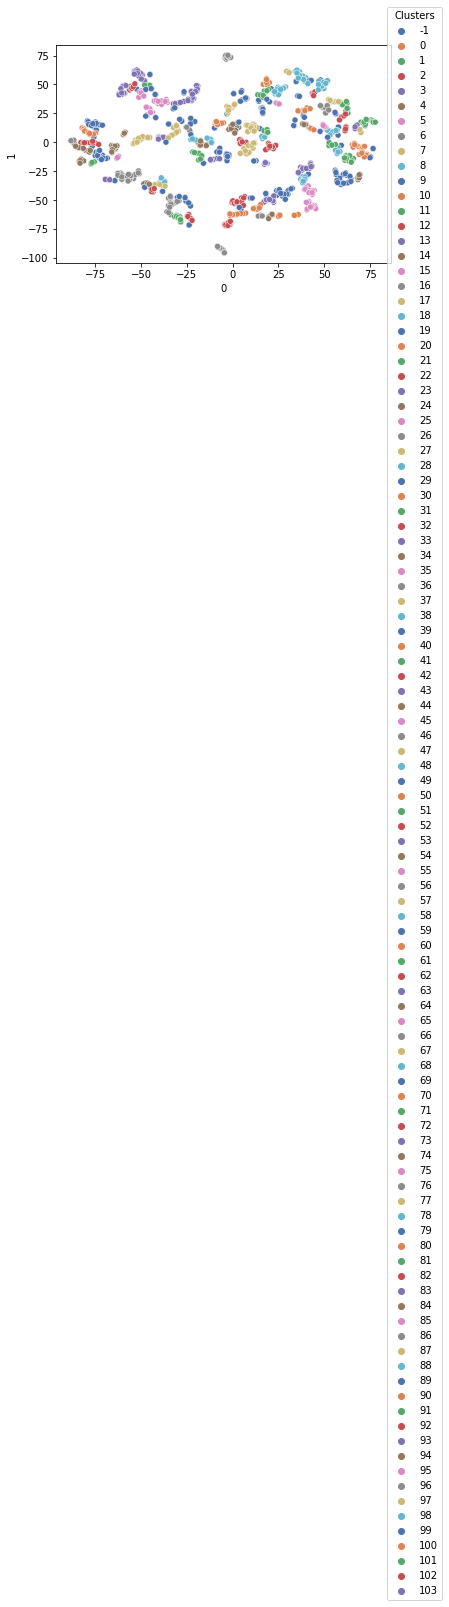

In [88]:
#DBSCAN
# -1 label represent noisy dataset(cannot be clustered)
clusters = DBSCAN(eps=2.5, min_samples=4).fit(df)
display(clusters.labels_)
display(Counter(clusters.labels_))
p = sns.scatterplot(data=df, x="0", y="1", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

In [89]:
c = pd.DataFrame(clusters.labels_)
train_datasets = c.loc[c[0] == c._get_value(len(c)-1, 0)]
for i in range(0,len(train_datasets.index)-1):
    tmp = tsne_daily["Close"+str(train_datasets.index[i])]
    tmp.to_csv("merged_daily_tsne.csv", index=False, header=False, mode='a')

#save scaler
merged = pd.read_csv("merged_daily_tsne.csv")
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(merged)
import pickle
scalerfile = 'tsne_scaler_daily.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

#Load scaler
import pickle
scalerfile = 'tsne_scaler_daily.sav'
scaler_daily = pickle.load(open(scalerfile, 'rb'))

df = pd.DataFrame(tsne_daily["Close"+str(train_datasets.index[0])])

#Normalize data
scaled_data = scaler_daily.fit_transform(df)
x_train = []
y_train = []
for i in range(7,len(scaled_data)):
  x_train.append(scaled_data[i-7:i,0])
  y_train.append(scaled_data[i,0])

#Convert x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

#Building the LSTM Model
daily_model = Sequential()
daily_model.add(LSTM(32, input_shape = (x_train.shape[1],1), activation='relu', return_sequences=False))
daily_model.add(Dense(1))
daily_model.compile(loss='mean_squared_error', optimizer='adam')

#Train Model
daily_model.fit(x_train, y_train ,batch_size = 1,epochs = 10,verbose = 0)
daily_model.save('tsne_daily_dataset_model7.h5')

for d in range(1,len(train_datasets.index)-1):
  print("----------------" + str(d) + "---------------------")
  df = pd.DataFrame(tsne_daily["Close"+str(train_datasets.index[d])])

  #Normalize data
  scaled_data = scaler_daily.fit_transform(df)
  x_train = []
  y_train = []
  for i in range(7,len(scaled_data)):
      x_train.append(scaled_data[i-7:i,0])
      y_train.append(scaled_data[i,0])

  #Convert x_train and y_train to numpy array
  x_train , y_train = np.array(x_train), np.array(y_train)
  #Reshape data
  x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
  daily_model = load_model('tsne_daily_dataset_model7.h5')
  daily_model.fit(x_train, y_train, epochs = 10, batch_size = 1,verbose=1)
  daily_model.save('tsne_daily_dataset_model7.h5')


----------------1---------------------
Epoch 1/10
244/244 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 2/10
244/244 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 3/10
244/244 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 4/10
244/244 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 5/10
244/244 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 6/10
244/244 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 7/10
244/244 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 8/10
244/244 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 9/10
244/244 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 10/10
244/244 [==============================] - 0s 1ms/step - loss: 0.0054
----------------2---------------------
Epoch 1/10
244/244 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 2/10
244/244 [==========

In [90]:
daily_model = load_model('tsne_daily_dataset_model7.h5')
# path = 'daily_dataset/' 
# files = os.listdir(path)
# df = pd.read_csv("C:/Users/keong/Documents/metaLearningForecasting/GRAB.csv")
# df = pd.read_csv("C:/Users/keong/Documents/metaLearningForecasting/daily_dataset/TSLA_daily.csv")
# df.set_index("Date", inplace=True)
# df = df.filter(["Close"])
df = target_data
#Normalize data
scaled_data = scaler_daily.fit_transform(df)
# x_train = []
# y_train = []
# training_data_len = int(len(df)*0.9)
training_data_len = 7
#Create Training Dataset
# train_data = scaled_data[0:training_data_len, : ]
# for i in range(7,len(train_data)):
#   x_train.append(train_data[i-7:i,0])
#   y_train.append(train_data[i,0])

#Convert x_train and y_train to numpy array
# x_train , y_train = np.array(x_train), np.array(y_train)
#Reshape data
# x_train  = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# x_train.shape

#Create the testing dataset
test_data = scaled_data[training_data_len-7: , :]
#Create data sets x_test and y_test
x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(7,len(test_data)):
  x_test.append(test_data[i-7:i,0])
#Convert data to a numpy array
x_test = np.array(x_test)
#reshape data
x_test  = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#get the models predicted price values
predictions = daily_model.predict(x_test)
predictions = scaler_daily.inverse_transform(predictions)
y_test = scaler_daily.inverse_transform(y_test)
#get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

8/8 [==============================] - 0s 1ms/step


0.003882396464445269

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


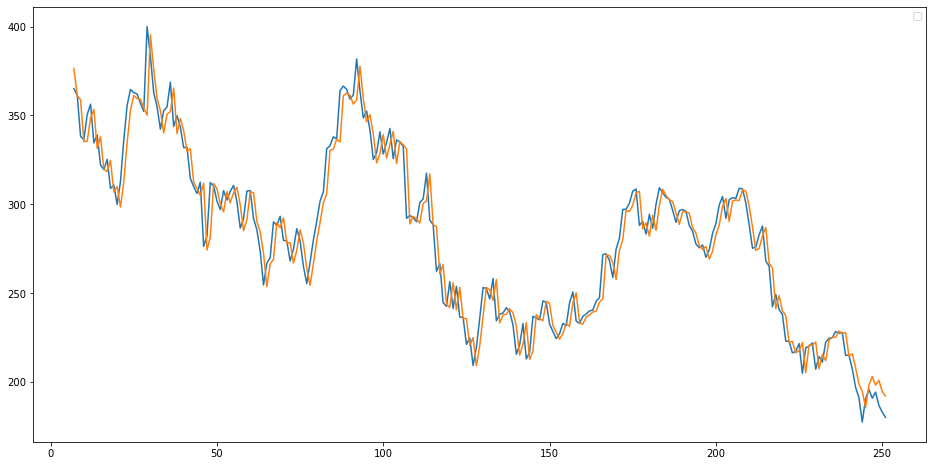

In [91]:
#Plot the graph
train = df[:training_data_len]
valid = df[training_data_len:]
valid["Predictions"] = predictions
#visualise data
plt.figure(figsize = (16,8))
# plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend()